# 08 - Robni problem lastnih vrednosti
<p style="font-weight: 600; text-align: center;">
Matematično-fizikalni praktikum, avgust 2024 <br>
Luka Skeledžija, 28201079
</p>

<style>
.MJXc-display{
    display: inline-block !important;
    width: 100%;
}
@media print {
    .pagebreak { page-break-before: always; } /* page-break-after works, as well */
}

img{
    width: 100%;
    max-width: 600px !important;
    margin: auto !important;
}

body {
    overflow: hidden;
    max-width: 600px;
    margin: auto;
}

::-webkit-scrollbar {
  width: 0px;
}

table{
    width: 100%;
}

h1 {
    text-transform: uppercase;
    text-align: center;
    background: #222222;
    color: white;
    padding: 8px;
}

blockquote {
    margin-left: 0em!important;
    margin-right: 0em!important;

}

.jp-RenderedHTMLCommon pre, .jp-RenderedHTMLCommon code {

    background-color: var(--jp-layout-color2)!important;
}

.jp-RenderedHTMLCommon pre{
    margin: 0.5em 0em!important;
    padding: 0em 1.5em!important;
}

body {
    counter-reset: h2counter;
}
h1 {
    counter-reset: h2counter;
}
h2:before {
    content: counter(h2counter) ".\0000a0\0000a0";
    counter-increment: h2counter;
    counter-reset: h3counter;
}
h3:before {
    counter-increment: h3counter;
    content: counter(h2counter) "." counter(h3counter) ".\0000a0\0000a0";
  
}




</style>


---

## Uvod

Pri robnem problemu lastnih vrednosti poznamo diferencialno enačbo
in nekaj robnih pogojev (običajno vsaj toliko, kolikor je red enačbe)
Za rešitev problema moramo v splošnem v enem zamahu določiti
tako (lastne) funkcije, ki ustrezajo danim robnim pogojem,
kot (lastne) vrednosti, ki skupaj zadoščajo diferencialni enačbi.
Reševanje robnih problemov je zato lahko bistveno bolj zapleteno
kot integracija začetnih problemov.


Numerično bomo reševali stacionarno Schrodingerjevo enačbo

\begin{equation*}
-\frac{\hbar^2}{2m}\,\frac{d^2\psi}{dx^2} + V(x)\psi = E\psi  
\end{equation*}

za neskončno potencialno jamo ($V(-a/2 < x < a/2)=0$ 
in $V(|x|\ge a/2)\to\infty$) ter za končno potencialno jamo
($V(|x|\ge a/2)=V_0$), za kateri poznamo analitične rešitve;
glej Strnad, Fizika II.  Dva značilna pristopa, diferenčna
metoda in strelska metoda, nas bosta pripravila na resnejše probleme,
za katere analitičnih rešitev ne poznamo.

Pri *diferenčni metodi* razdelimo interval
$[-a/2,a/2]$ na $N$ točk ($x_i = -a/2 + ia/N$) in prepišemo drugi
krajevni odvod v drugo diferenco, tako da ima brezdimenzijska enačba obliko
\begin{equation*}
\frac{\psi_{i-1} - 2\psi_i + \psi_{i+1}}{h^2} + E\psi_i = 0  
\end{equation*}
oziroma
\begin{equation*}
\psi_{i-1} - (2-\lambda)\psi_i + \psi_{i+1} = 0 \>,  
\end{equation*}
kjer je $\lambda=Eh^2=k^2h^2$.  Diskretizirati je treba tudi robna
pogoja pri $x=-a/2$ in $x=a/2$, ki sta v splošnem (in tudi
pri končni jami) mešanega tipa,
\begin{align*}
c_1 \psi_0 + c_2 \frac{\psi_1 - \psi_{-1}}{2h} =& 0 \>, \\
d_1 \psi_N + d_2 \frac{\psi_{N+1} - \psi_{N-1}}{2h} =& 0 \>,
\end{align*}
medtem ko sta pri neskončni jami preprostejša, $\psi_0=\psi_N=0$.
V primerih potencialnih jam tako dobimo tridiagonalni sistem $N$
oziroma $N-1$ linearnih enačb
\begin{equation*}
A \underline{\psi} = \lambda \underline{\psi}   
\end{equation*}
za lastne vektorje $\underline{\psi}$ in lastne vrednosti $\lambda$,
ki ga rešujemo z diagonalizacijo.  

Pri *strelski metodi* začnemo s *kosinusnim* začetnim pogojem
v izhodišču $\psi(0)=1$, $\psi'(0)=0$ ali *sinusnim* pogojem
$\psi(0)=0$, $\psi'(0)=1$, nato pa z nekim izbranim $E$ diferencialno
enačbo s poljubno integracijsko shemo (npr.~RK4) integriramo do roba
$x=a/2$ in tam preverimo, ali je izpolnjen drugi robni pogoj, $\psi(a/2)=0$.
Vrednost $E$ spreminjamo tako dolgo, dokler robni pogoj ni izpolnjen do
zahtevane natančnosti, in tako dobimo sode in lihe rešitve enačbe
skupaj z ustreznimi lastnimi vrednostmi energije.


In [2]:
# Standardized imports for MFPR
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import seaborn as sns
from IPython.display import HTML, display
import markdown
import datetime
import scipy.special as sp
import scipy.stats as stats
import scipy.optimize as opt
import scipy.interpolate as interp
from matplotlib import animation
import logging
import timeit
# Function and constants defitition for Juptyer notebook (rerun for hot reload of imports)

plt.rcParams['figure.dpi'] = 300
plt.rcParams['text.usetex'] = True
plt.rcParams["grid.linestyle"]="dashed"
plt.rcParams["figure.edgecolor"] = "black"
# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

def log_msg(msg, log_filename='my_log_file.log'):
    # Configure the logging module if not already configured
    if not logging.root.handlers:
        logging.basicConfig(
            filename=log_filename,
            level=logging.DEBUG,
            format='%(asctime)s - %(name)s - %(levelname)s - %(message)s'
        )

    # Create a logger for the function (you can replace 'my_function' with your desired logger name)
    logger = logging.getLogger('EIGENSTATES')

    # Log the provided message
    logger.info(msg)
def clear_log_file(log_filename='my_log_file.log'):
    with open(log_filename, 'w'):
        pass

def centerHTML(html, text=""):
    text = markdown.markdown(text)
    return '<div style="display: flex; align-items: center; flex-direction: column;">' + html + f'</div><div style="display: flex; align-items: center; flex-direction: column;padding-top: 15px;"><small style="max-width: 600px">{text}</small></div>'

def insertHTMLVideo(filename, text=""):
    return centerHTML(f'<video controls src="{filename}" style="max-width: 600px;width:100%"></video>', text)

def insertHTMLAudio(filename, text=""):
    return centerHTML(f'<audio controls src="{filename}" style="max-width: 600px;width:100%"></audio>', text)


clear_log_file()
log_msg('START logging...')


## Neskončna potencialna jama

Neskončno potencialno jamo lahko rešimo analitično. Imamo enačbo

$$ - \frac{\hbar^2}{2m} \frac{d^2 \psi}{dx^2} = E \psi, $$

z robnima pogojema $\psi (-a/2) = \psi(a / 2) = 0$. Račun je malce lažji, če jamo premaknemo za $a/2$ in dobimo nov rob na $x=0$ in $x=1$. Diferencialno enačbo ob pogoju $E > 0$ reši nastavek

$$ \psi (x) = A \sin(kx) + B \cos(kx), $$

kjer je $k = \sqrt{2mE/\hbar^2}$. Če upoštevamo robni pogoj pri $x = 0$, dobimo $B = 0$, za $x=a$ pa dobimo $A \sin(kx)$. Sledi, da je $k_n = \frac{n \pi}{a}$, kjer je $n \in \mathbb{N}$. Lastne energije lahko tedaj izrazimo kot:

$$ E_n = \frac{\hbar^2 \pi^2}{2ma^2} n^2. $$

Konstanto $A$ izrazimo s pomočjo pogoja normalizacije

$$ \int^{a/2}_{-a/2} | \psi(x) |^2 dx = 1 \rightarrow A = \sqrt{\frac{2}{a}}. $$

Lastne funkcije so torej:

$$ \psi_n (x) = \sqrt{\frac{2}{a}} \sin \left( \frac{n \pi x}{a} \right). $$

Lastne funkcije bomo v nadaljevanju poiskali numerično s pomočjo dveh različnih metod, in sicer diferenčne metode in metode streljanja.

### Strelska metoda

Pri strelski metodi robni problem (Boundary Value Problem - BVP) prevtorimo v problem začetne vrednosti (Initial Value Problem - IVP), kjer iščemo optimalni $\psi'(a)$ za dane robne pogoje. Najprej rešimo IVP z oceno odvoda in ga nato iterativno prilagajamo dokler ne dobimo vrednosti, ki zadovoljuje $\psi(a/2, k) = 0$ za $E= k^2$. 

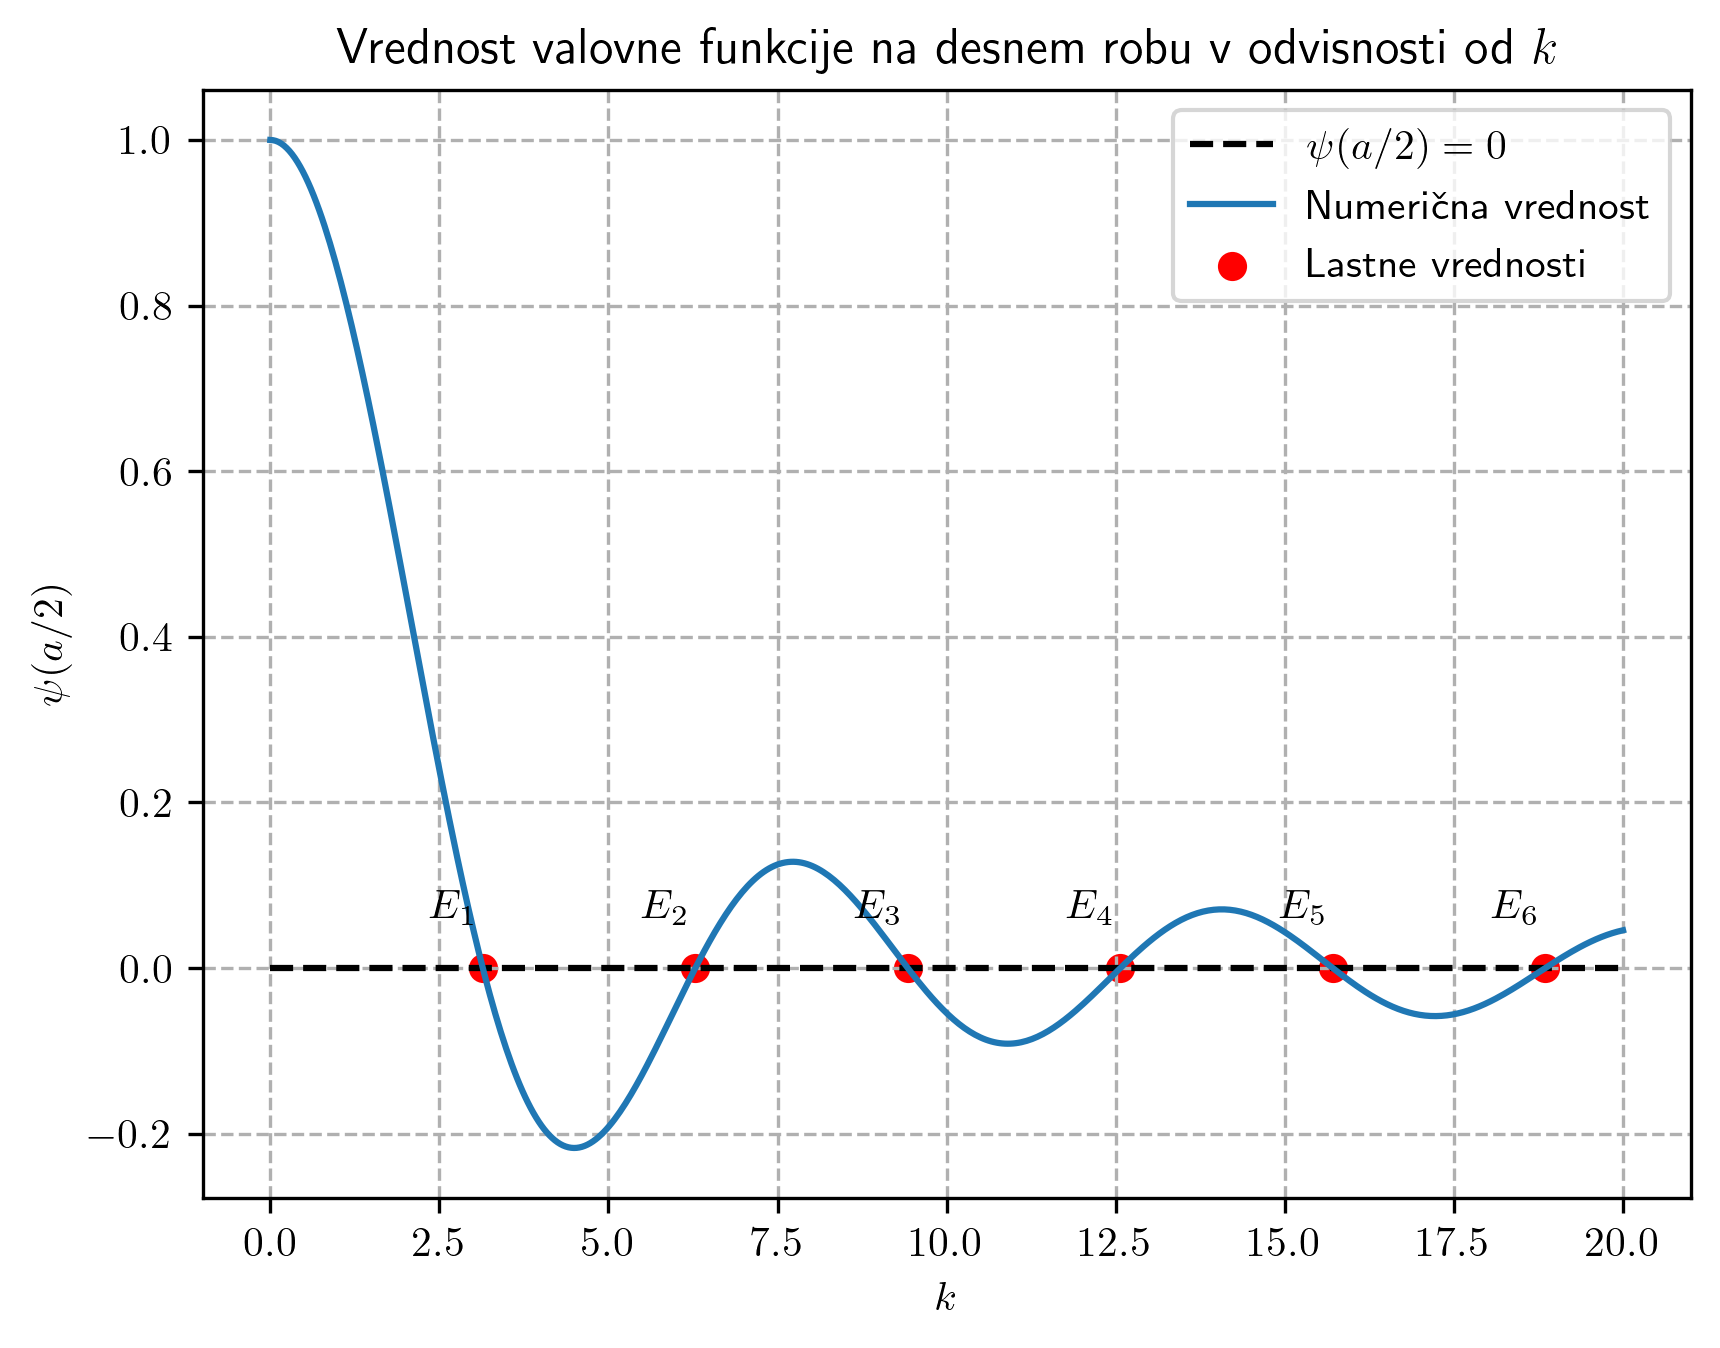

In [3]:
from bvp import fd, shoot
from diffeq import rk4

def schrodinger(x, k):
    return np.array([x[1], -k**2 * x[0]])

n = 500
k_s = np.linspace(0, 20, n)
t = np.linspace(0, 1, n)

solutions = np.ones_like(k_s)
for i, k in enumerate(k_s):
    f = lambda x, t: schrodinger(x, k)
    x = rk4(f, [0., 1.], t)
    solutions[i] = x[-1, 0]

# find the zeros
zero_crossings = np.where(np.diff(np.sign(solutions)))[0]
k_zeros = np.array([opt.brentq(lambda k: interp.interp1d(k_s, solutions)(k), k_s[i], k_s[i+1]) for i in zero_crossings])


plt.hlines(0, 0, 20, linestyles='dashed', colors='black', label='$\psi(a/2) = 0$')
plt.plot(k_s, solutions, label='Numerična vrednost')

plt.grid()
plt.xlabel('$k$')
plt.ylabel('$\psi(a/2)$')
plt.title('Vrednost valovne funkcije na desnem robu v odvisnosti od $k$')
plt.scatter(k_zeros, np.zeros_like(k_zeros), color='red', label='Lastne vrednosti')
# write text E1, E2, ...
for i, k in enumerate(k_zeros):
    label = '$E_{' + str(i+1) + '}$'
    plt.text(k - 0.1, 0.05, label,  verticalalignment='bottom', horizontalalignment='right')

plt.legend()
plt.show()


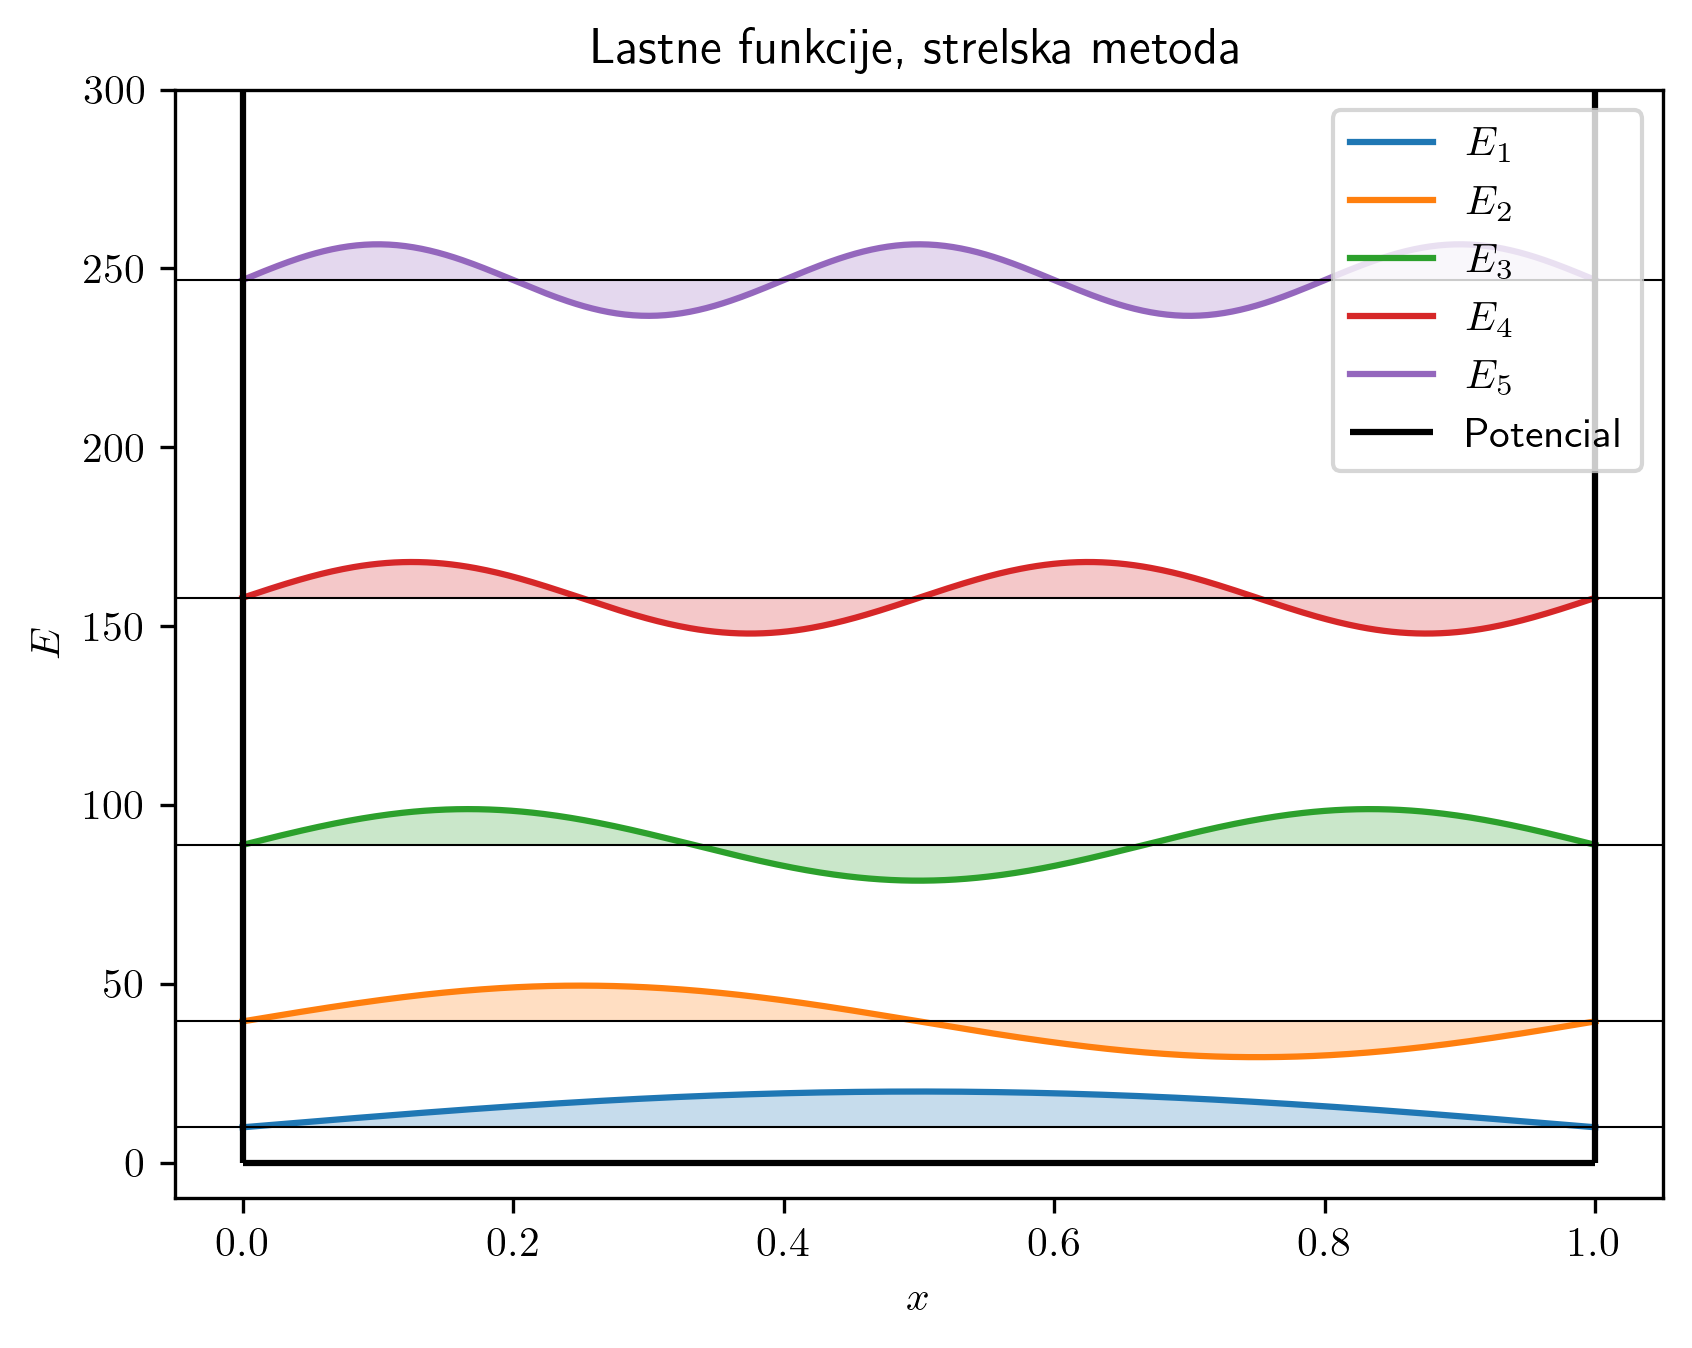

In [4]:
# draw the eigenfunctions

t = np.linspace(0, 1, n)
eigenf = [rk4(lambda x, t: schrodinger(x, k), [0., 1.], t)[:, 0] for k in k_zeros]

for i, k in enumerate(k_zeros):
    if i > 4:
        break
    En = '$E_{' + str(i+1) + '}$'
    y = k**2 + 10 * k * eigenf[i]
    plt.plot(t, y, label=En)
    plt.fill_between(t, k**2, y, alpha=0.25)
    plt.axhline(k**2, linestyle='solid', color='black', linewidth=0.5)

plt.hlines(0, 0, 1, linestyles='solid', colors='black')
plt.vlines(0, 0, 300, linestyles='solid', colors='black')
plt.vlines(1, 0, 300, linestyles='solid', colors='black', label='Potencial')

plt.ylim(-10, 300)
plt.xlabel('$x$')
plt.ylabel('$E$')
plt.title('Lastne funkcije, strelska metoda')
plt.legend()
plt.show()


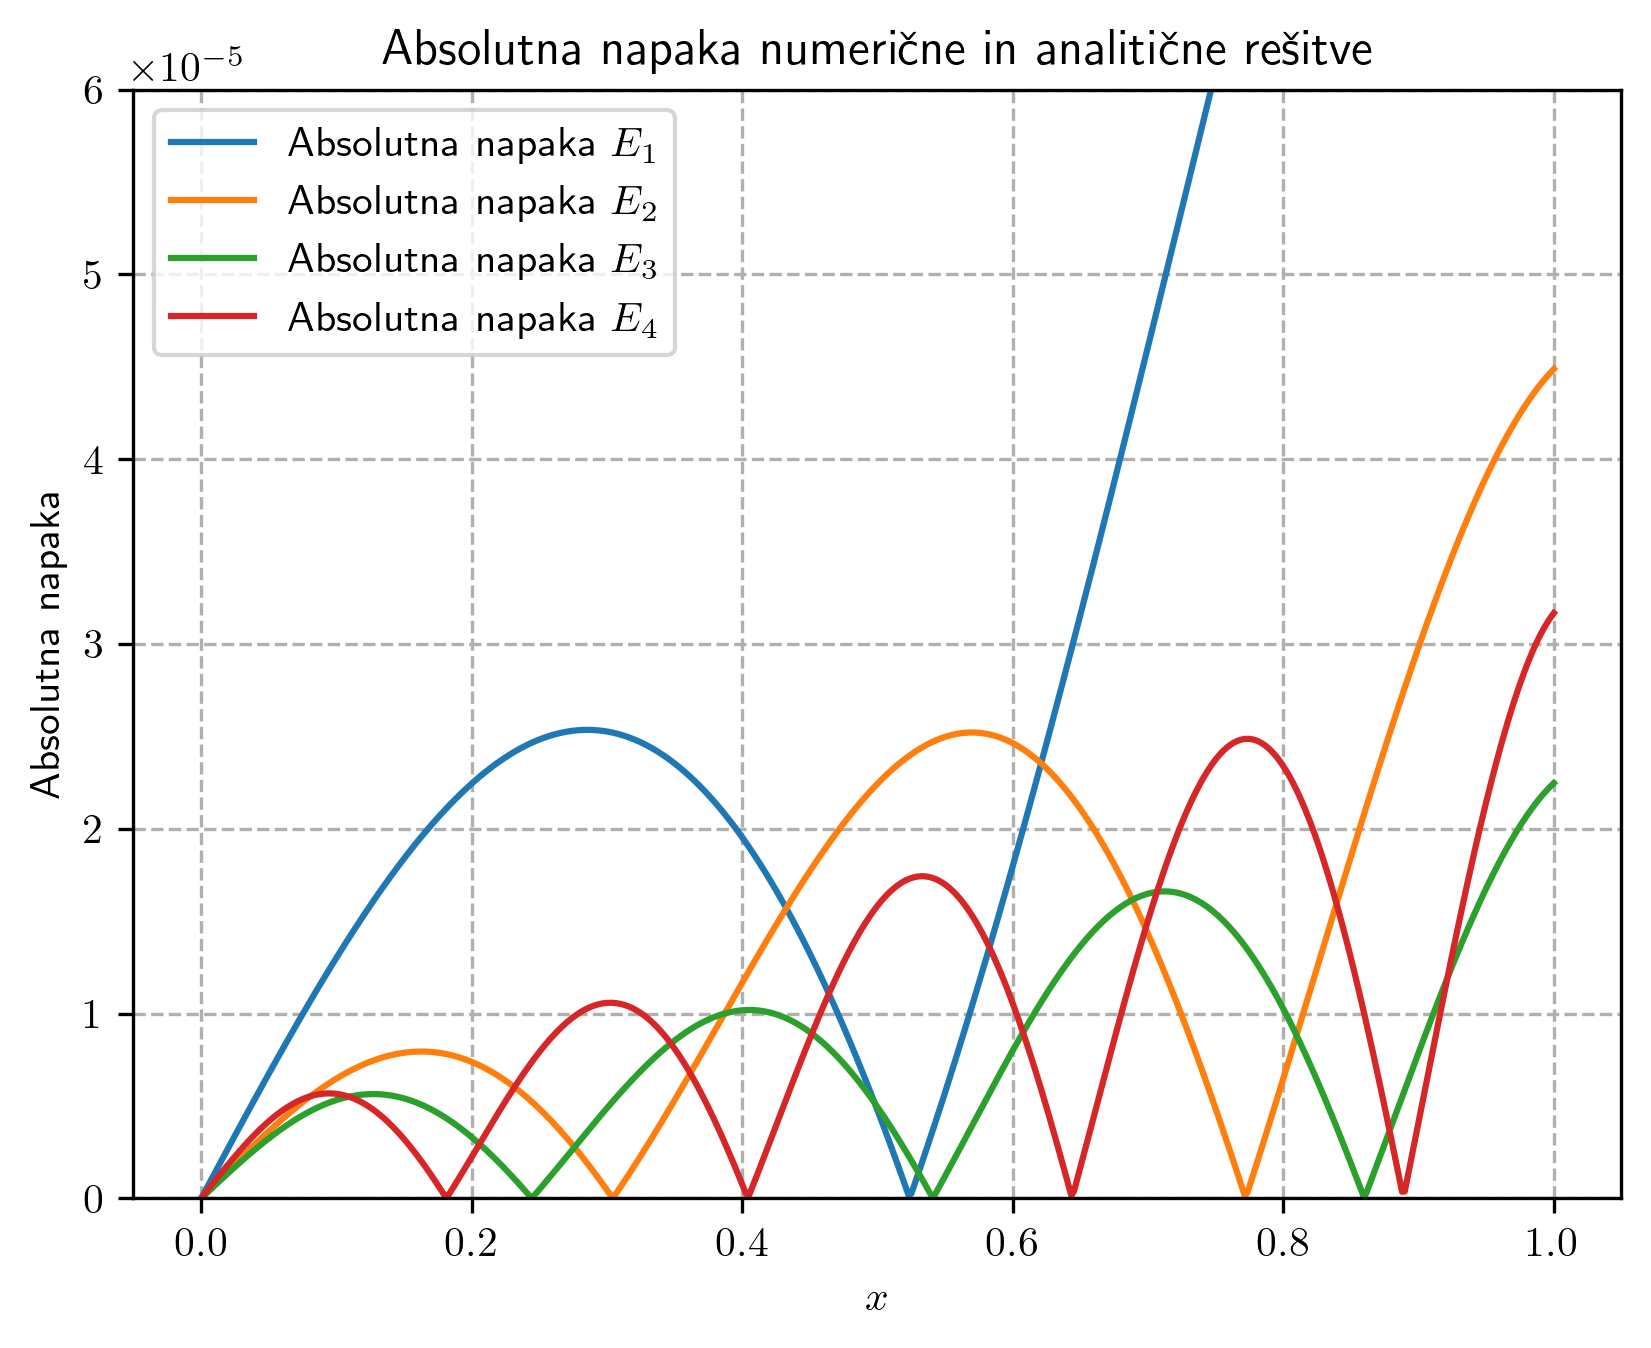

In [5]:
def analytic_infinite_well(x, n):
    return np.sin(n * np.pi * x)

# compare the numerical and analytical solutions

for i, numeric_sol in enumerate(eigenf):
    if i > 3:
        break
    analytic = analytic_infinite_well(t, i+1)
    normalized_numeric = numeric_sol / np.max(np.abs(numeric_sol))
    plt.plot(t, np.abs(analytic - normalized_numeric), label=f'Absolutna napaka $E_{{{i+1}}}$')


plt.xlabel('$x$')
plt.ylabel('Absolutna napaka')
plt.title('Absolutna napaka numerične in analitične rešitve')
plt.legend()
plt.ylim(0, 6e-5)
plt.grid()
plt.show()

največje razlike na robovih, spodnji graf enako kot če bi vzel točke samo na robu

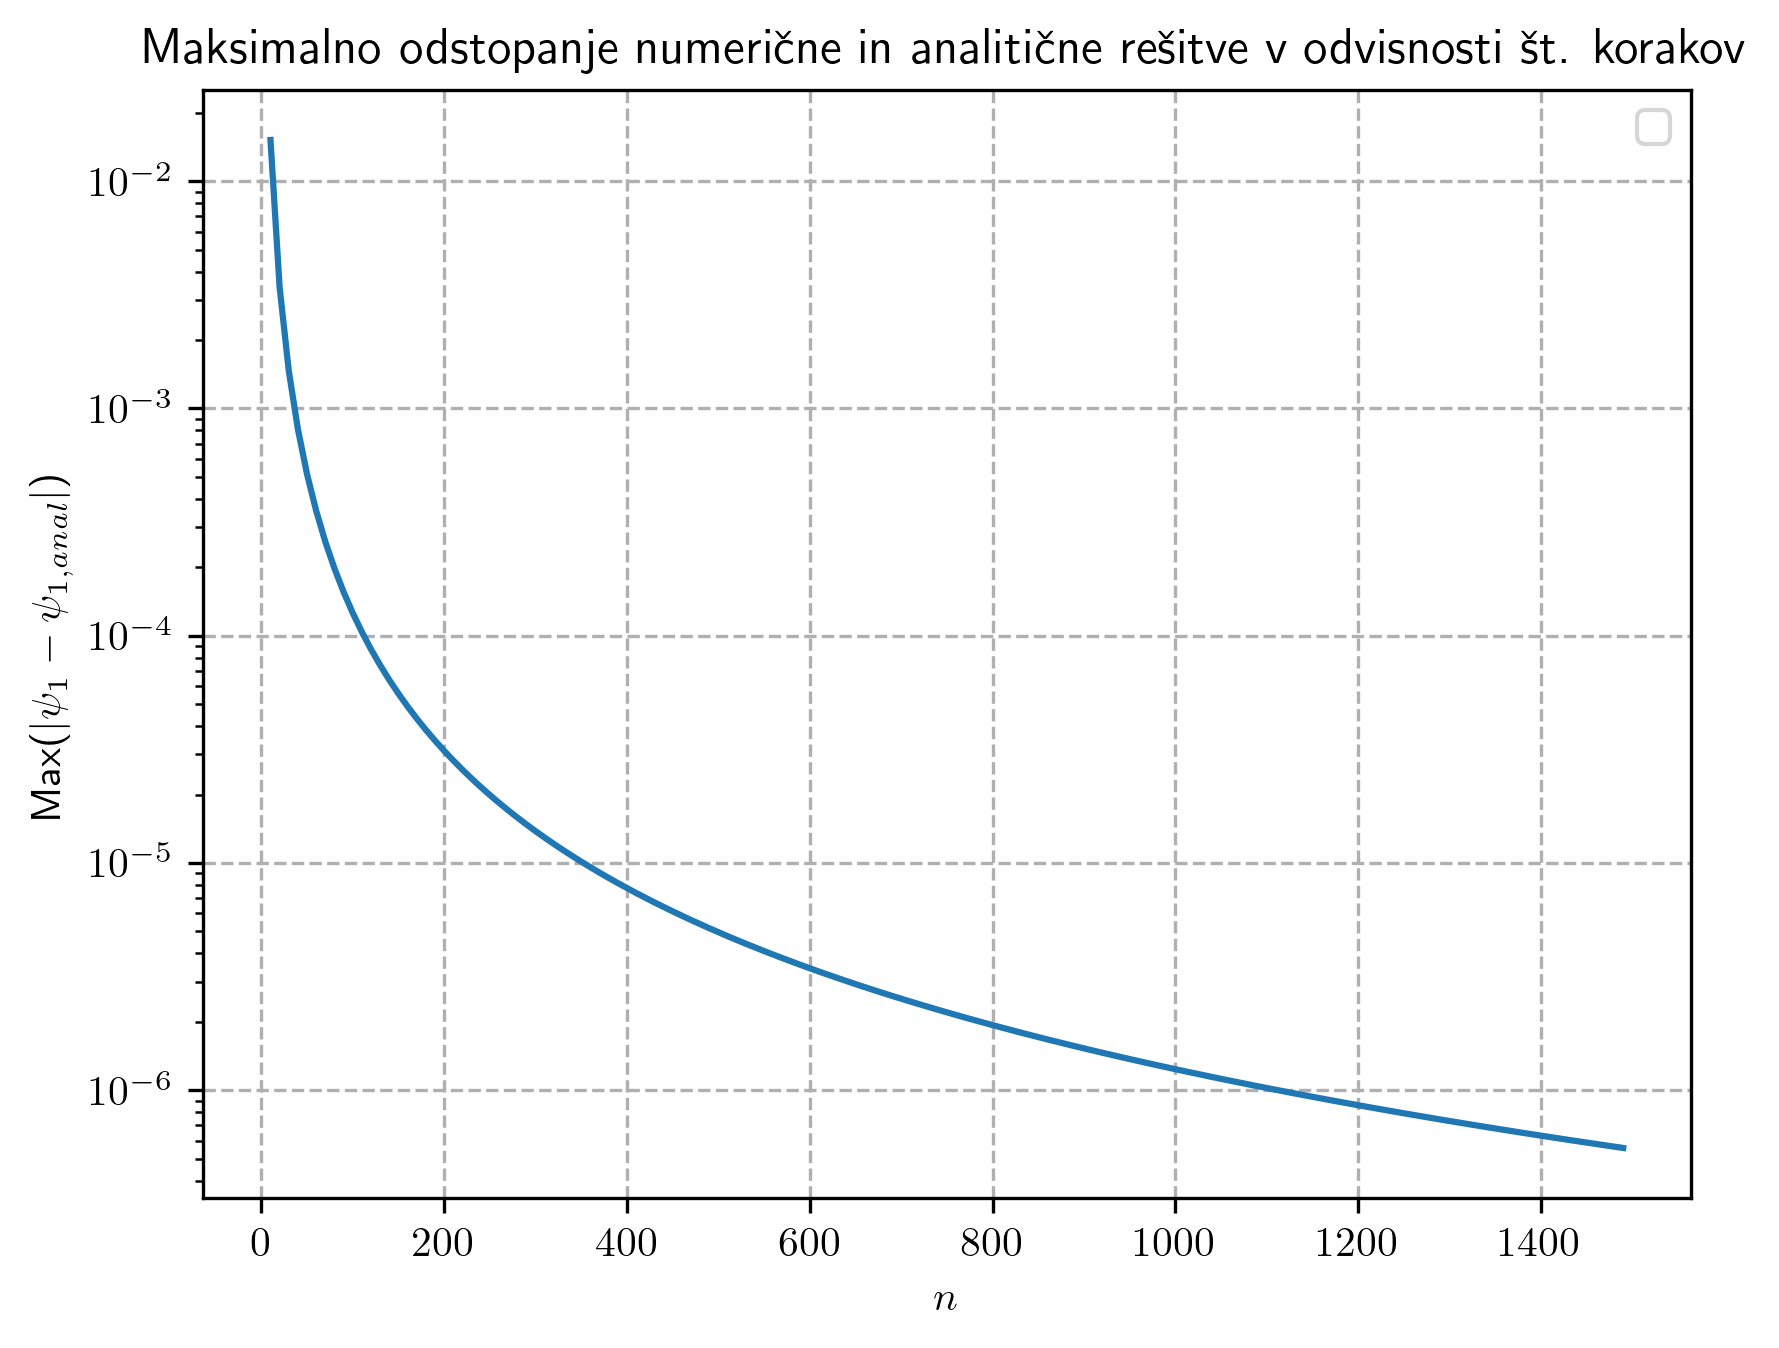

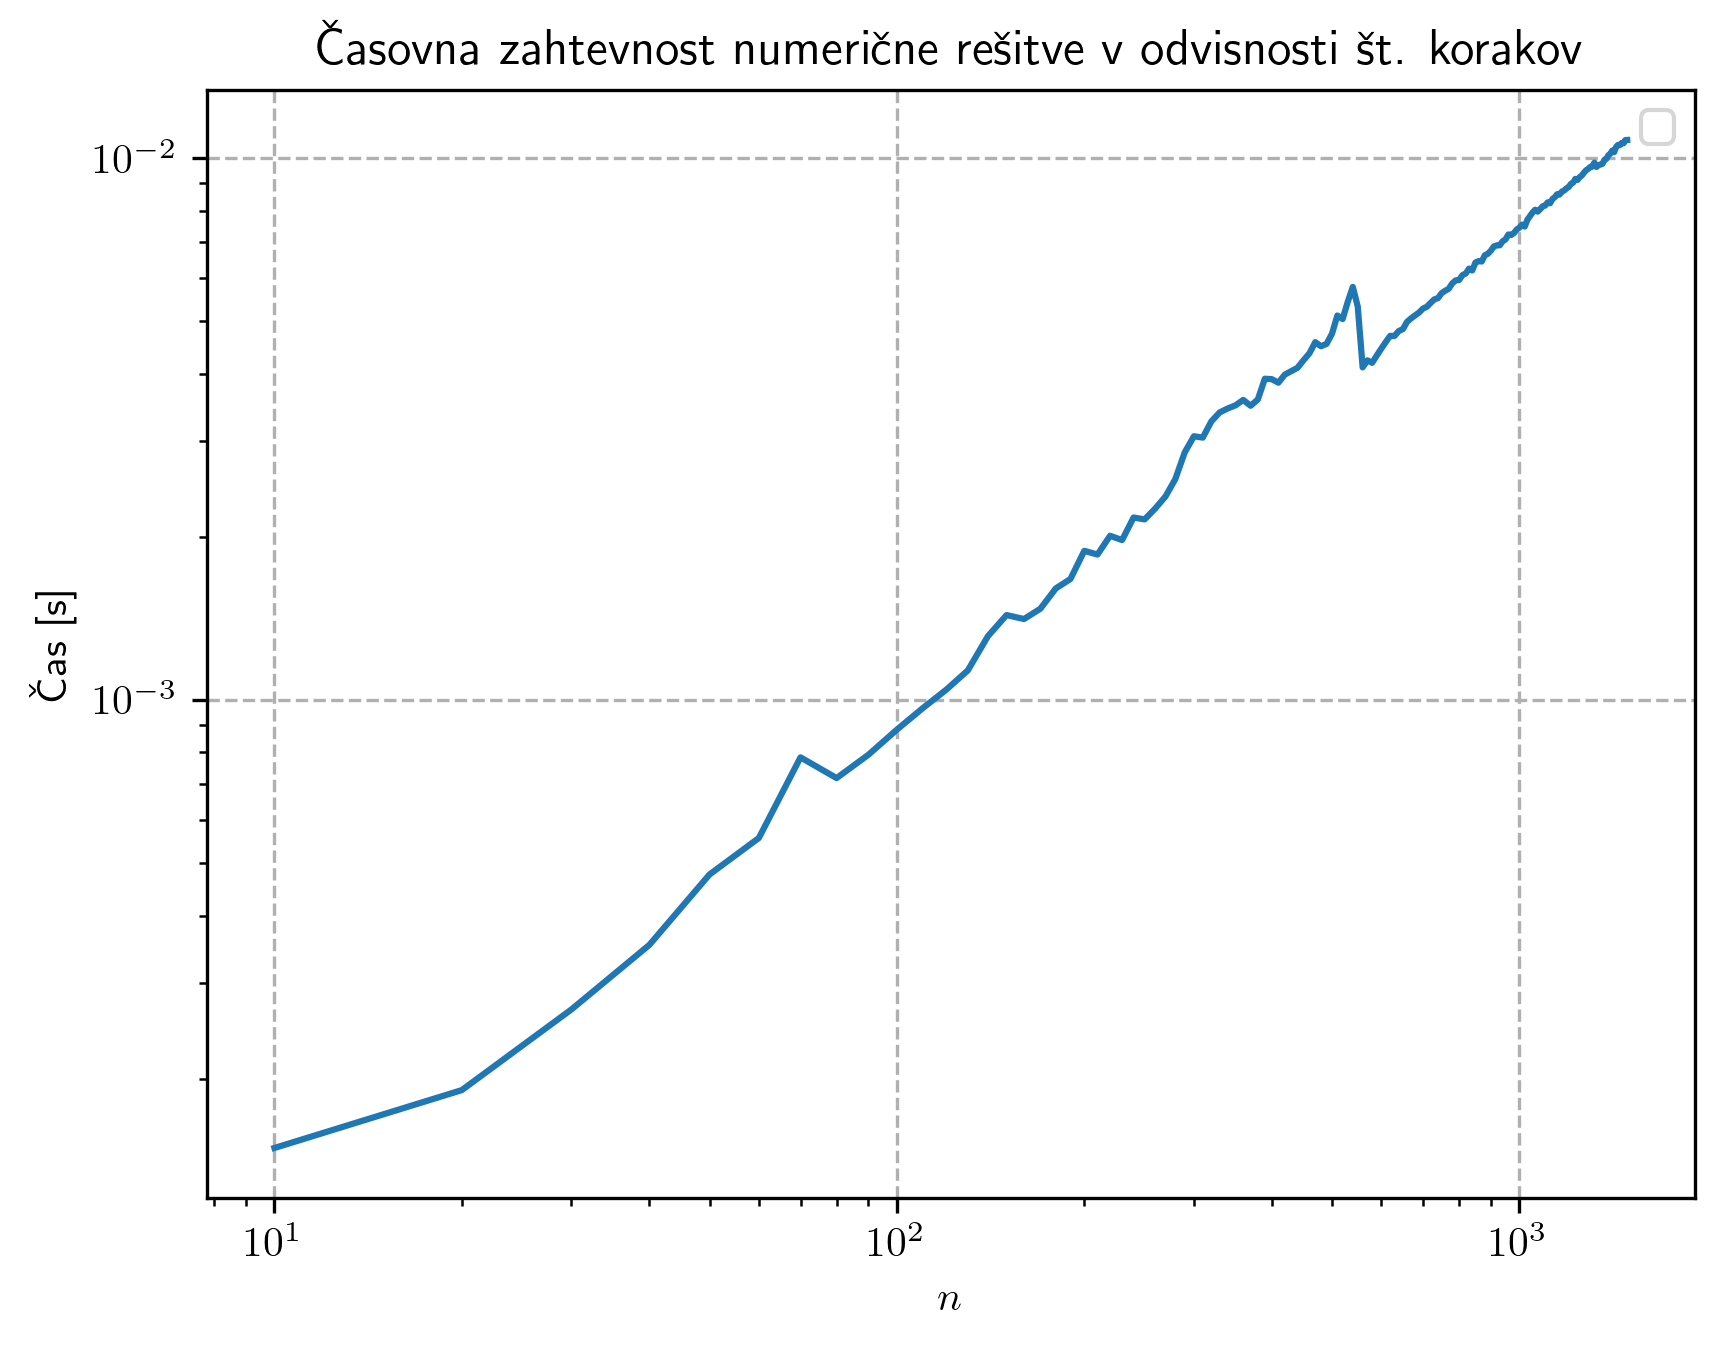

In [6]:
n_s = range(10, 1500, 10)
odstopanje = []
calc_time = []
for j, n in enumerate(n_s):
    start_time = timeit.default_timer()
    i = 0
    t = np.linspace(0, 1, n)
    analytic = analytic_infinite_well(t, i+1)
    f = lambda x, t: schrodinger(x, np.pi)
    x = rk4(f, [0., 1.], t)
    solution = x[:, 0]
    solution = solution / np.max(np.abs(solution))
    diff = np.abs(analytic - solution)
    odstopanje.append(np.max(diff))
    calc_time.append(timeit.default_timer() - start_time)

plt.plot(n_s, odstopanje)
plt.xlabel('$n$')
plt.ylabel("Max($| \psi_1 - \psi_{1, anal}|$)")
plt.title('Maksimalno odstopanje numerične in analitične rešitve v odvisnosti št. korakov')
plt.legend()
plt.grid()
plt.yscale('log')
plt.show()

plt.plot(n_s, calc_time)
plt.xlabel('$n$')
plt.ylabel("Čas [s]")
plt.title('Časovna zahtevnost numerične rešitve v odvisnosti št. korakov')
plt.legend()
plt.grid()
plt.yscale('log')
plt.xscale('log')
plt.show()

### Diferenčna metoda

Pri diferenčni metodi Schrodingerjevo enačbo prepišemo v sledečo obliko

$$ - \frac{\psi_{i-1} - 2 \psi_i + \psi_{i+1}}{h^2} + V(x_i) \psi_i = E \psi_i, $$ 

ki jo lahko razpišemo v sistem linearnih enačb oblike $A \psi = E \psi$, kjer je $A$ sledeča tridiagonalna matrika:

$$ A = - h^{-2} \begin{bmatrix}
-2 - h^2 V(x_1) & 1 & 0 & 0 \\
1 & -2 - h^2 V(x_2) & 1 & 0 \\
0 & 1 & ... & 1 \\
0 & 0 & 1 & -2 - h^2 V(x_{N-1}) 
\end{bmatrix}  .$$

Za nas velja $V = 0$. Lastne vrednosti in vektorje smo poiskali z metodo `numpy.linalg.eig`.

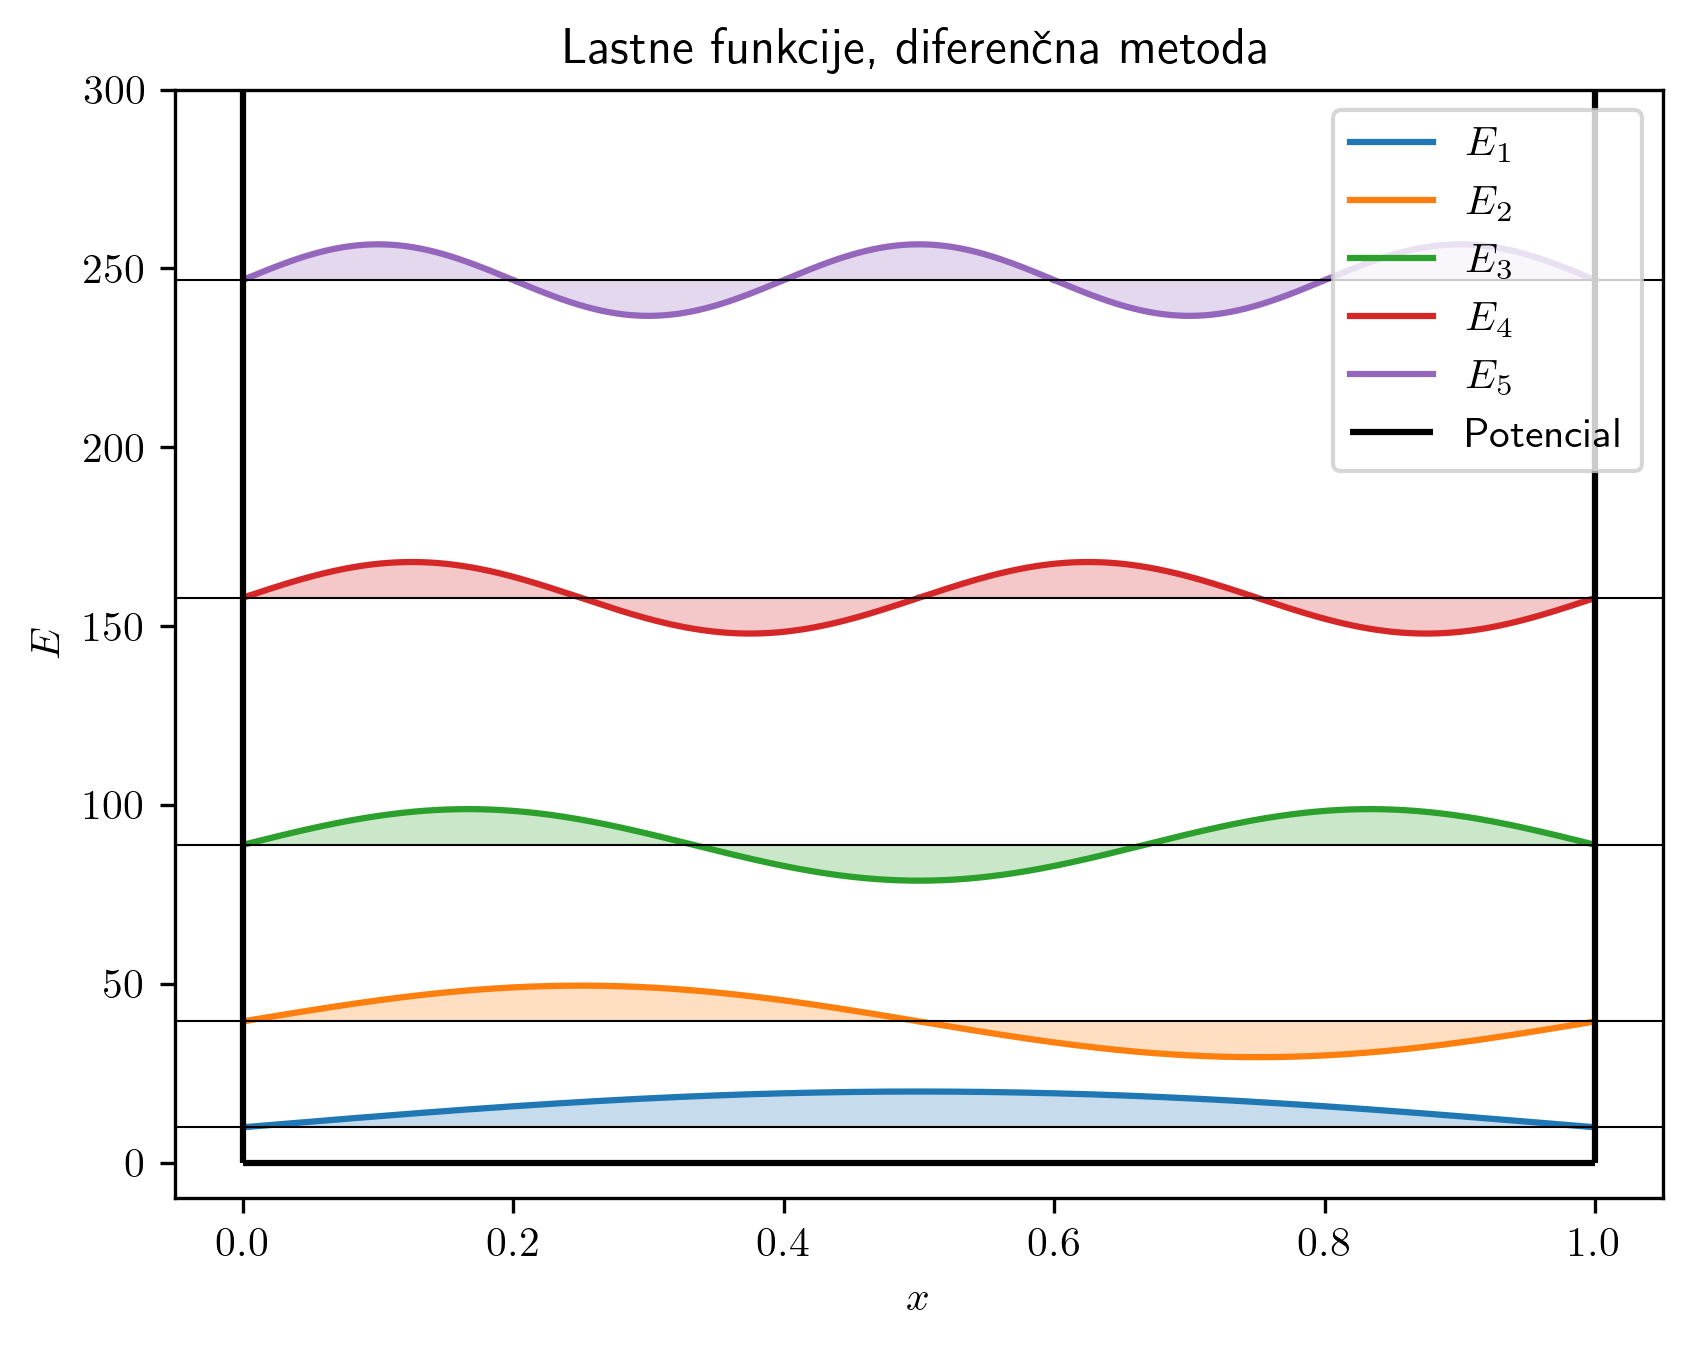

In [51]:
def gen_matrix(N, h):
    n = N-2
    diagonal = -2*np.eye(n, k=0)
    side = np.eye(n, k=1)
    return -(diagonal + side + side.T) / h**2


def finite_differences(t):
    N = len(t)
    h = np.abs(t[1] - t[0])
    matrika = gen_matrix(N, h)
    eigval, eigv = np.linalg.eigh(matrika)
    eigv = eigv.T
    eigval = eigval/eigval[0]
    eig_vectors = []
    for vec in eigv:
        avec = np.abs(vec)
        direction = 1
        eigvec = []
        for i in range(1, N-3):
            if avec[i-1] > avec[i] and avec[i] < avec[i+1] and vec[i] < 0:
                direction *= -1
            eigvec.append(avec[i]*direction)
            if avec[i-1] > avec[i] and avec[i] < avec[i+1] and vec[i] > 0:
                direction *= -1
        eig_vectors.append(eigvec/max(eigvec))

    return eig_vectors, eigval

t = np.linspace(0, 1, 1000)
vectors, values = finite_differences(t)
values = values * np.pi**2

for i in range(5):
    k = np.sqrt(values[i])
    y = 10 *vectors[i]+k**2
    En = '$E_{' + str(i+1) + '}$'
    plt.plot(t[2:-2], y, label=En)
    plt.fill_between(t[2:-2], k**2, y, alpha=0.25)
    plt.axhline(k**2, linestyle='solid', color='black', linewidth=0.5)

plt.hlines(0, 0, 1, linestyles='solid', colors='black')
plt.vlines(0, 0, 300, linestyles='solid', colors='black')
plt.vlines(1, 0, 300, linestyles='solid', colors='black', label='Potencial')

plt.ylim(-10, 300)
plt.xlabel('$x$')
plt.ylabel('$E$')
plt.title('Lastne funkcije, diferenčna metoda')
plt.legend()
plt.show()


## Zaključek


---
Luka Skeledžija, [Github source 🔗](https://github.com/lukaske/mafijski-praktikum/tree/main/MFPR/08_bvp), 2024